# Intuit Quickbooks Upgrade

* Team-lead GitLab userid: dbeaudreau
* Group name: Team Nine From Outer Space
* Team member names: Danielle Beaudreau, Nicholas Feldman, Wan-Ting Hsu, Chenxuan Liu, Yijie Shi

## Setup

Please complete this python notebook with your group by answering the questions in `intuit-redux.pdf`. Create a Notebook and HTML file with all your results and comments and push both the Notebook and HTML file to GitLab when your team is done. All results MUST be reproducible (i.e., the TA and I must be able to recreate the HTML file from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the rsm-msba-spark docker container.

This is the second group assignment for MGTA 455 and you will be using Git and GitLab. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's change to accept so the team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes from the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitLab. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `model1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file 
* If you are going to work simultaneously, do it in different notebooks, e.g., 
    - model1.ipynb, model2.ipynb, model3.ipynb
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/git-group-workflow-wbg.png)

Tutorial videos about using Git, GitLab, and GitGadget for group assignments:

* Setup the MSBA server to use Git and GitLab: https://youtu.be/zJHwodmjatY
* Dealing with Merge Conflicts: https://youtu.be/qFnyb8_rgTI
* Group assignment practice: https://youtu.be/4Ty_94gIWeA

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit
import seaborn as sns

# from sklearn.feature_extraction import DictVectorizer
# from sklearn.pipeline import Pipeline
from sklearn import metrics
# from sklearn.model_selection import cross_val_score
import xgboost as xgb
# from sklearn_pandas import DataFrameMapper
# from sklearn_pandas import CategoricalImputer
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
from utils import functions as f
from sklearn.neural_network import MLPClassifier
# import sys
# !{sys.executable} -m pip install git+git://github.com/scikit-learn/scikit-learn.git

# increase plot resolution
# mpl.rcParams["figure.dpi"] = 150

/opt/conda/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
## loading the data - this dataset must NOT be changed
intuit75k = pd.read_pickle("data/intuit75k.pkl")
intuit75k["res1_yes"] = (intuit75k["res1"] == "Yes").astype(int)
intuit75k.head()

,id,zip,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,training,res1_yes
0,1,94553,18,Male,0,2,109.5,5,12,0,0,0,No,1,0
1,2,53190,10,Unknown,0,1,69.5,4,3,0,0,0,No,0,0
2,3,37091,8,Male,0,4,93.0,14,29,0,0,1,No,0,0
3,4,02125,1,Male,0,1,22.0,17,1,0,0,0,No,1,0
4,5,60201,11,Male,0,1,24.5,2,3,0,0,0,No,0,0


In [3]:
# show dataset description
rsm.describe(intuit75k)

## Intuit: Quickbooks upgrade

The purpose of this exercise is to gain experience modeling the response to an upsell campaign. The `intuit75k.rds` file contains data on 75,000 (small) businesses that were selected randomly from the 801,821 that were sent the wave-1 mailing. The mailing contained an offer to upgrade to the latest version of the Quickbooks software. 

Variable `res1` denotes which of these businesses responded to the mailing by purchasing Quickbooks version 3.0 from Intuit Direct. Note that Intuit Direct sells products directly to its customers rather than through a retailer. Use the available data to predict which businesses that did not respond to the wave-1 mailing, are most likely to respond to the wave-2 mailing. Note that variables were added, deleted, and recoded so please ignore the variable descriptions in Exhibit 3 in the case in the course reader. Instead, use the variable descriptions below:

## Variable description

* id: Small business customer ID
* zip: 5-Digit ZIP Code (00000=unknown, 99999=international ZIPs).
* zip_bins: Zip-code bins (20 approx. equal sized bins from lowest to highest zip code number)
* sex: "Female", "Male", or "Unknown"
* bizflag: Business Flag.  Address contains a Business name (1 = yes, 0 = no or unknown).
* numords: Number of orders from Intuit Direct in the previous 36 months
* dollars: Total $ ordered from Intuit Direct in the previous 36 months
* last: Time (in months) since last order from Intuit Direct in previous 36 months
* sincepurch: Time (in months) since original (not upgrade) purchase of Quickbooks
* version1: Is 1 if customer's current Quickbooks is version 1, 0 if version 2
* owntaxprod: Is 1 if customer purchased tax software, 0 otherwise
* upgraded: Is 1 if customer upgraded from Quickbooks vs. 1 to vs. 2
* res1: Response to wave 1 mailing ("Yes" if responded else "No")
* training: 70/30 split, 1 for training sample, 0 for validation sample



Pseudo R-squared (McFadden): 0.155
Pseudo R-squared (McFadden adjusted): 0.153
Area under the RO Curve (AUC): 0.773
Log-likelihood: -8488.405, AIC: 17008.811, BIC: 17150.708
Chi-squared: 52386.317 df(15), p.value < 0.001 
Nr obs: 52,500

None


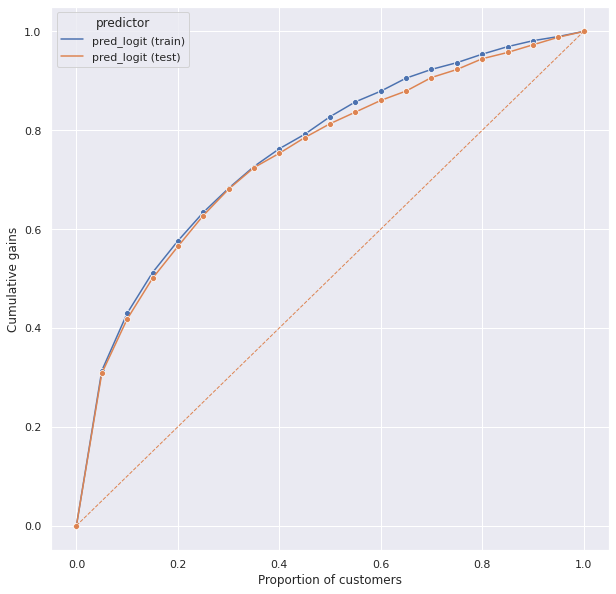

In [4]:
%run ./sub-notebooks/logit.ipynb

Fitting 3 folds for each of 2 candidates, totalling 6 fits

Best parameters: 
{'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 2, 'subsample': 0.5}

Best score: 
0.7697386897456605

Best CV Model: AUC = 0.764704 at iteration 38

Refitted Model: AUC = 0.764869 at iteration 44


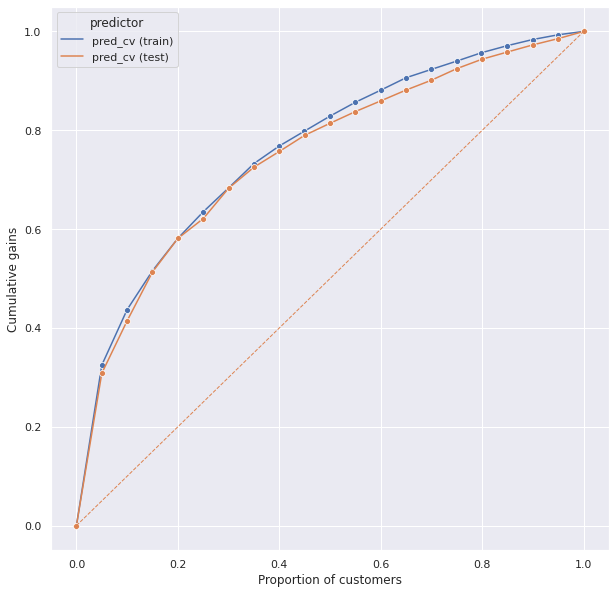

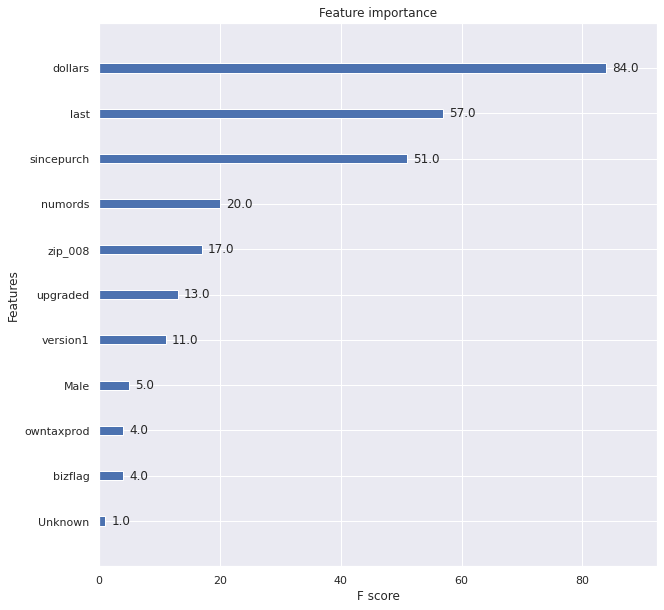

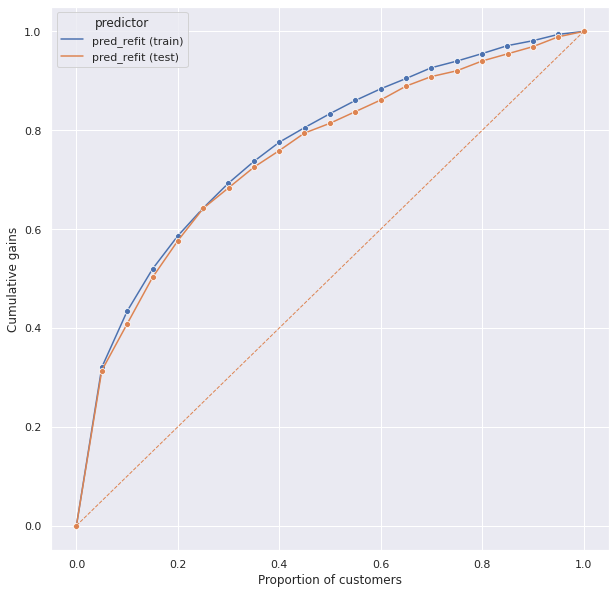

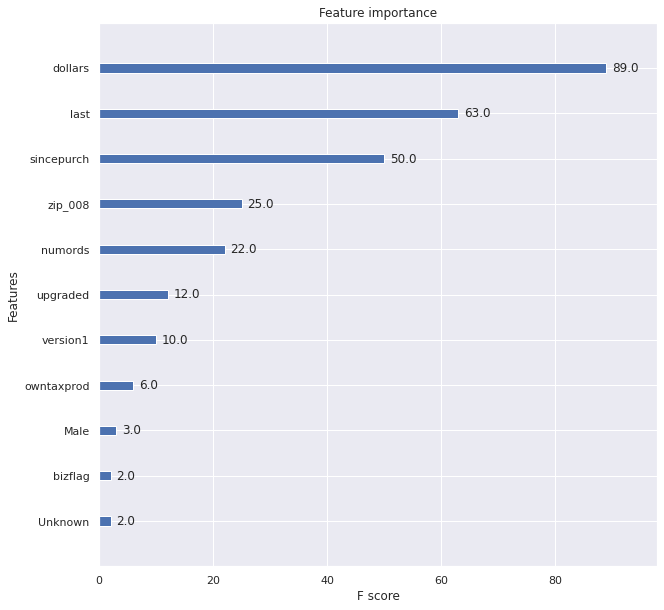

In [5]:
# run python code from another notebook

%run ./sub-notebooks/tree.ipynb

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (5, 9), 'solver': 'adam'}
0.7727513686513353


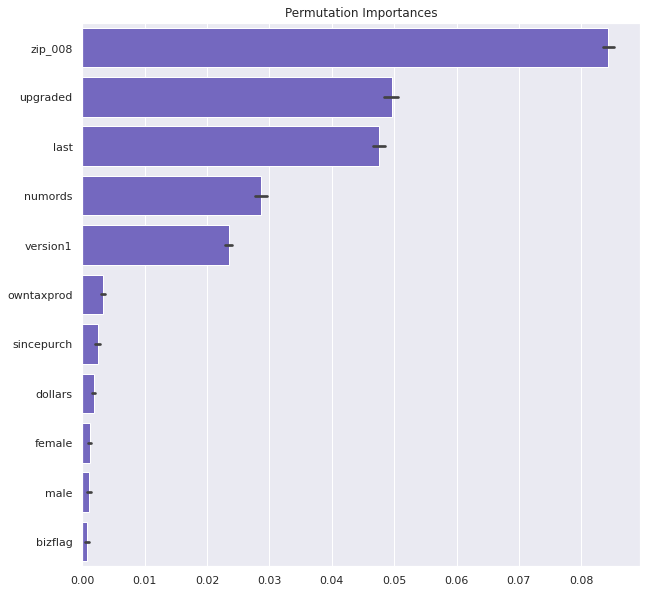

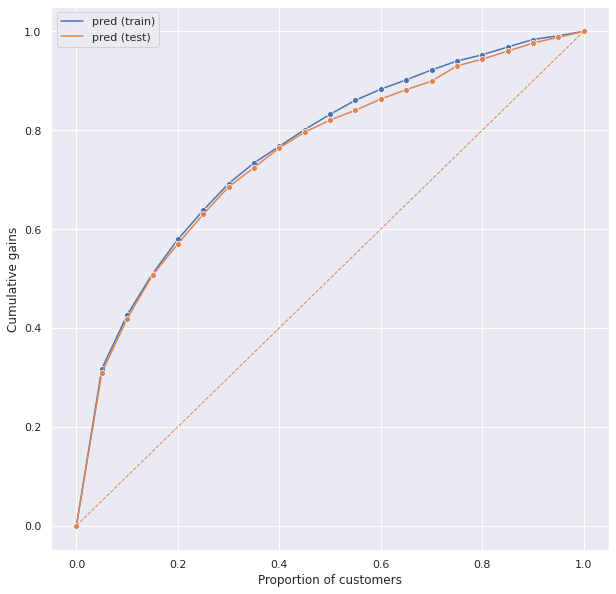

NN Train AUC: 0.776

NN Test AUC: 0.766



In [6]:
%run ./sub-notebooks/neural_1.ipynb

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (5, 7, 7), 'solver': 'adam'}
0.7724411278751443


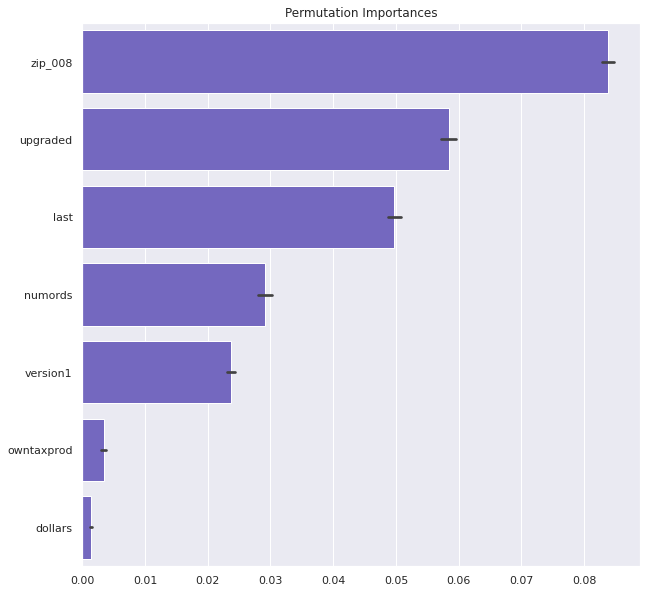

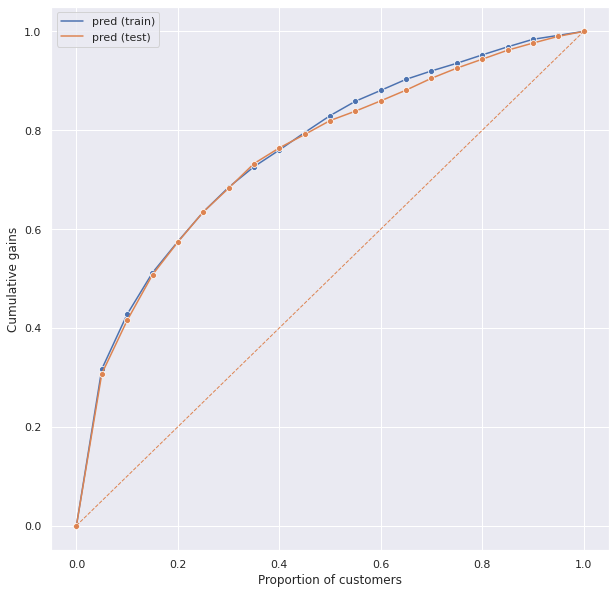

NN Train AUC: 0.774

NN Test AUC: 0.767



In [7]:
%run ./sub-notebooks/neural_2.ipynb

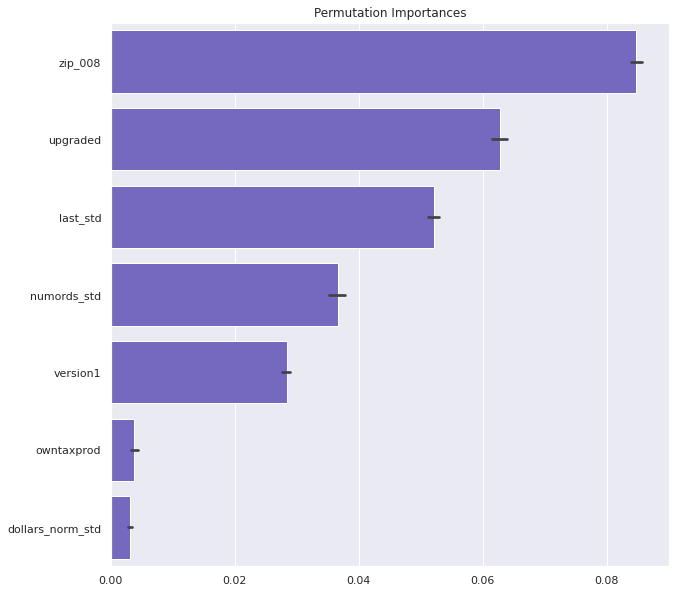

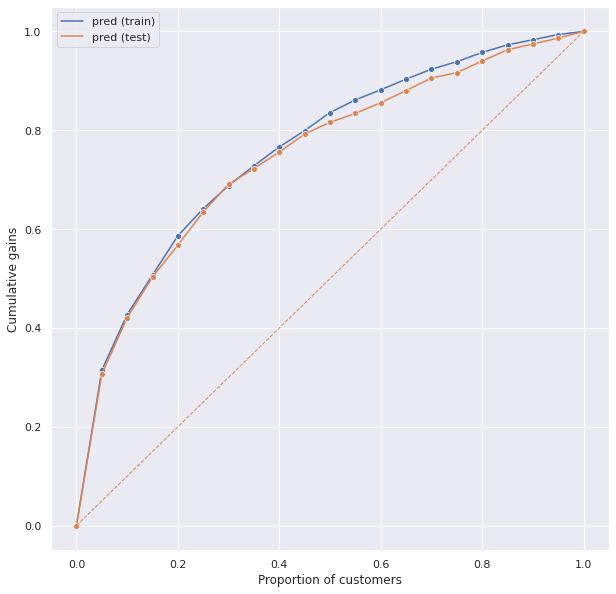

NN Train AUC: 0.776

NN Test AUC: 0.764



In [8]:
%run ./sub-notebooks/neural_3.ipynb

In [9]:
%run ./sub-notebooks/profits.ipynb


Using logistic regression, Intuit sends to 6440 customers costing 9080.40. 
There are 368 responses at 5.71%, the revenue is 22050.00. 
The actual profit is 12969.60, and ROME 142.83%.

For CV XGBoost model, Intuit sends to 5884 customers costing 8296.44. 
There are 352 responses at 5.97%, the revenue is 21090.00. 
The actual profit is 12793.56, and ROME 154.21%.

Using refitted XGBoost model, Intuit sends to 6057 customers costing 8540.37. 
There are 362 responses at 5.97%, the revenue is 21690.00. 
The actual profit is 13149.63, and ROME 153.97%.

Using neural network 1, Intuit sends to 6665 customers costing 9397.65. 
There are 376 responses at 5.65%, the revenue is 22590.00. 
The actual profit is 13192.35, and ROME 140.38%.

Using neural network 2, Intuit sends to 6699 customers costing 9445.59. 
There are 375 responses at 5.60%, the revenue is 22500.00. 
The actual profit is 13054.41, and ROME 138.21%.

Using neural network 3, Intuit sends to 6445 customers costing 9087.45. 
Ther

In [10]:
%run ./sub-notebooks/csv.ipynb

In [11]:
sum(df[(df['training'] == 0) & (df['res1_yes'] == 0)].sendto_comb)

5684

In [12]:
df

,id,training,res1_yes,pred_logit,sendto_logit,pred_cv,sendto_cv,pred_refit,sendto_refit,pred_nn,sendto_nn,pred_nn_2,sendto_nn_2,pred_nn_3,sendto_nn_3,pred_comb,sendto_comb
0,1,1,0,0.014347,False,0.013077,False,0.015220,False,0.016012,False,0.015087,False,0.015497,False,0.014884,False
1,2,0,0,0.013695,False,0.012264,False,0.012826,False,0.010223,False,0.014696,False,0.014061,False,0.012961,False
2,3,0,0,0.040590,True,0.034849,True,0.042519,True,0.041899,True,0.044958,True,0.045365,True,0.041733,True
3,4,1,0,0.007443,False,0.007198,False,0.008035,False,0.006173,False,0.007708,False,0.006900,False,0.007241,False
4,5,0,0,0.013141,False,0.011539,False,0.013515,False,0.015800,False,0.016416,False,0.013094,False,0.013926,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,74996,1,1,0.022644,False,0.031006,True,0.029782,True,0.023615,True,0.023961,True,0.023576,True,0.025744,True
74996,74997,1,0,0.002040,False,0.006425,False,0.005264,False,0.006250,False,0.006688,False,0.003478,False,0.005020,False
74997,74998,1,0,0.024618,True,0.041707,True,0.032020,True,0.025432,True,0.024772,True,0.030956,True,0.029882,True
74998,74999,1,0,0.024805,True,0.021404,False,0.024491,True,0.023608,True,0.023073,False,0.025031,True,0.023746,True
